In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error as mse
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

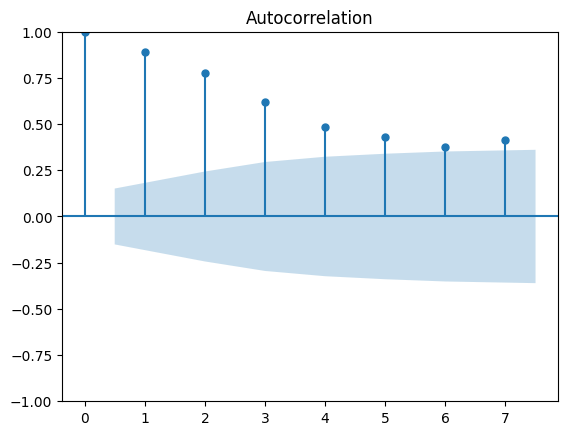

In [2]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')
plot_acf(df['Milk'],lags=7)
plt.show()

In [3]:
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]


In [4]:
model = auto_arima(y_train, trace=True,error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1593.690, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1624.299, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1626.095, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1626.164, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1622.458, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1604.395, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1618.644, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1572.502, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1562.233, Time=0.45 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 s

In [5]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index=y_test.index,columns=['Prediction'])
forecast

,Prediction
156,833.198661
157,853.564666
158,882.984866
159,883.121241
160,885.341751
161,886.851119
162,888.603140
163,890.272365
164,891.969841
165,893.657677


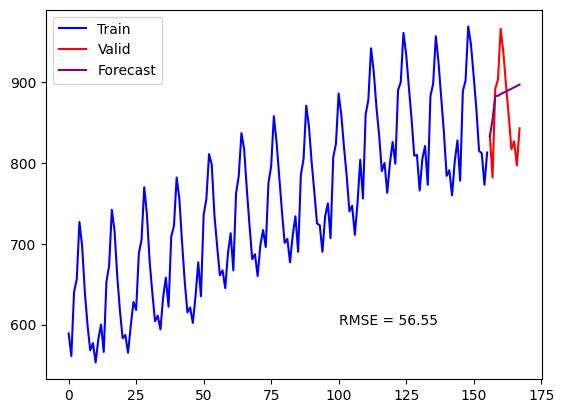

In [8]:
# plot the prediction for the test set 
plt.plot(y_train,label='Train',color='blue')
plt.plot(y_test,label='Valid',color='red')
plt.plot(forecast,label='Forecast',color='purple')
error = round(sqrt(mse(y_test,forecast)),2)
plt.text(100,600,"RMSE = "+str(error))
plt.legend(loc='best')
plt.show()


__WGEM__

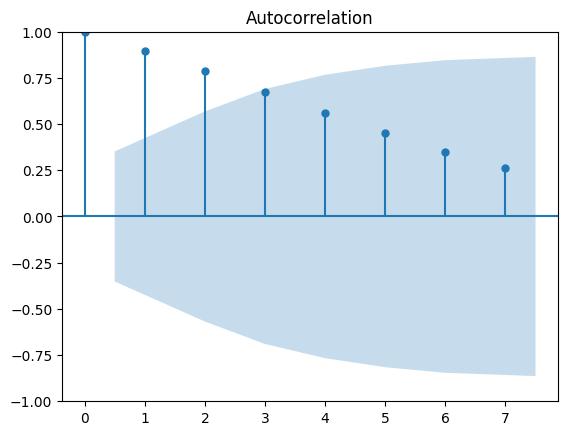

In [25]:
df = pd.read_csv('WGEM-IND_CPTOTNSXN.csv')
plot_acf(df['Value'], lags=7)
plt.show()


In [26]:
y_train = df['Value'][:-4]
y_test = df['Value'][-4:]

In [27]:
model = auto_arima(y_train, trace=True,error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.240, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=92.766, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=92.810, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.165, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=91.712, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=91.639, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=93.617, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.332 seconds


In [28]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index=y_test.index,columns=['Prediction'])
forecast

,Prediction
27,146.103576
28,158.916236
29,172.135834
30,185.762370


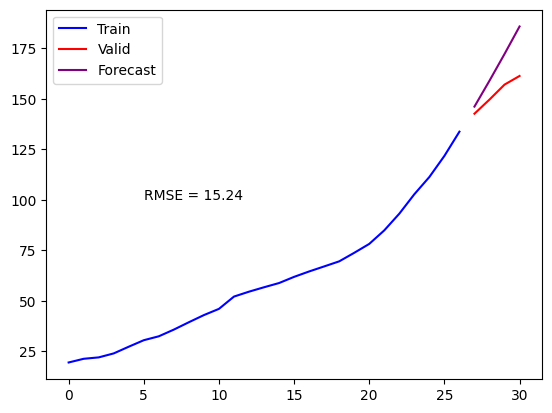

In [29]:
# plot the prediction for the test set 
plt.plot(y_train,label='Train',color='blue')
plt.plot(y_test,label='Valid',color='red')
plt.plot(forecast,label='Forecast',color='purple')
error = round(sqrt(mse(y_test,forecast)),2)
plt.text(5,100,"RMSE = "+str(error))
plt.legend(loc='best')
plt.show()


__BundesBank__

           Date    Value
0    30-04-1968    39.10
1    31-05-1968    42.00
2    30-06-1968    40.95
3    31-07-1968    38.90
4    31-08-1968    39.85
..          ...      ...
572  31-12-2015  1062.25
573  31-01-2016  1112.90
574  29-02-2016  1234.15
575  31-03-2016  1233.60
576  30-04-2016  1237.70

[577 rows x 2 columns]


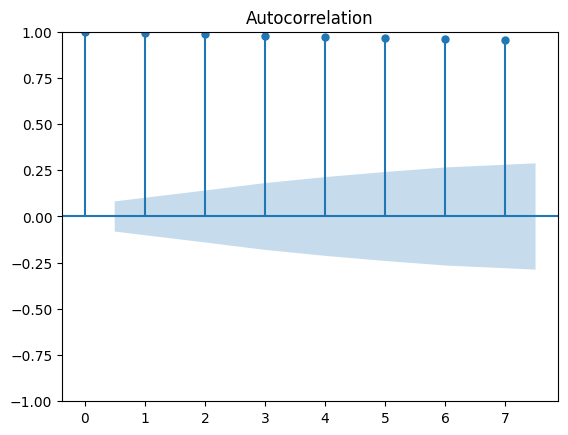

In [30]:
df = pd.read_csv('BUNDESBANK-BBK01_WT5511.csv')
print(df)
plot_acf(df['Value'], lags=7)
plt.show()



In [31]:
y_train = df['Value'][:-6]
y_test = df['Value'][-6:]


In [32]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5685.919, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5681.456, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5680.751, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5685.643, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5682.083, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5681.760, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5683.409, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5680.967, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.546 seconds


In [33]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast, index=y_test.index, columns=['Prediction'])
forecast


,Prediction
571,1146.968799
572,1148.908900
573,1150.849001
574,1152.789101
575,1154.729202
576,1156.669302


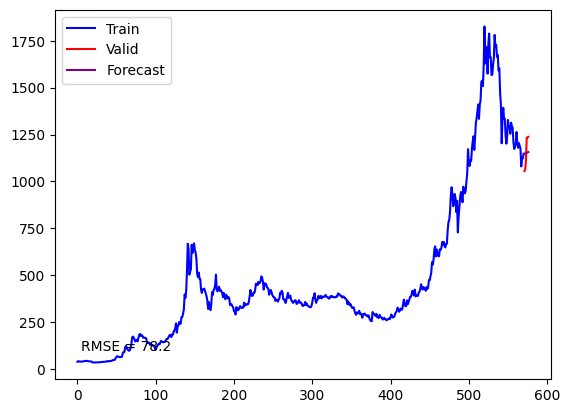

In [34]:
# plot the prediction for the test set 
plt.plot(y_train, label='Train', color='blue')
plt.plot(y_test, label='Valid', color='red')
plt.plot(forecast, label='Forecast', color='purple')
error = round(sqrt(mse(y_test, forecast)), 2)
plt.text(5, 100, "RMSE = " + str(error))
plt.legend(loc='best')
plt.show()

__WGEM SARIMA__

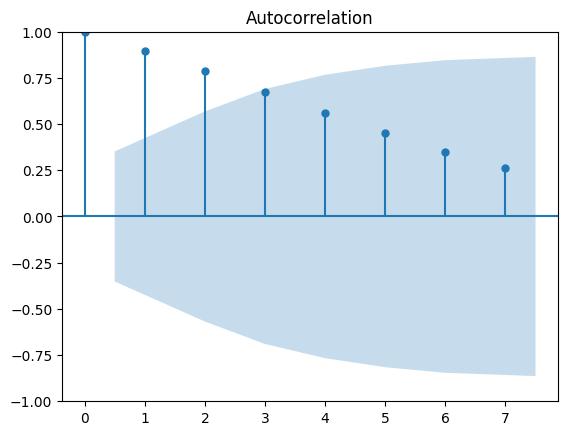

In [40]:
df = pd.read_csv('WGEM-IND_CPTOTNSXN.csv')
plot_acf(df['Value'], lags=7)
plt.show()



In [41]:
y_train = df['Value'][:-4]
y_test = df['Value'][-4:]



In [42]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True,seasonal=True,m=2)


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,0,1)[2]             : AIC=95.487, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[2]             : AIC=91.240, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[2]             : AIC=94.730, Time=0.02 sec
 ARIMA(0,2,1)(0,0,1)[2]             : AIC=94.761, Time=0.02 sec
 ARIMA(0,2,0)(1,0,0)[2]             : AIC=93.173, Time=0.01 sec
 ARIMA(0,2,0)(0,0,1)[2]             : AIC=93.205, Time=0.02 sec
 ARIMA(0,2,0)(1,0,1)[2]             : AIC=inf, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[2]             : AIC=92.766, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[2]             : AIC=92.810, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[2]             : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[2] intercept   : AIC=91.165, Time=0.01 sec
 ARIMA(0,2,0)(1,0,0)[2] intercept   : AIC=93.162, Time=0.02 sec
 ARIMA(0,2,0)(0,0,1)[2] intercept   : AIC=93.163, Time=0.02 sec
 ARIMA(0,2,0)(1,0,1)[2] intercept   : AIC=93.060, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[2] intercept   : AIC=91.712, Time=0.01 sec
 AR

In [43]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast, index=y_test.index, columns=['Prediction'])
forecast


,Prediction
27,146.103576
28,158.916236
29,172.135834
30,185.762370


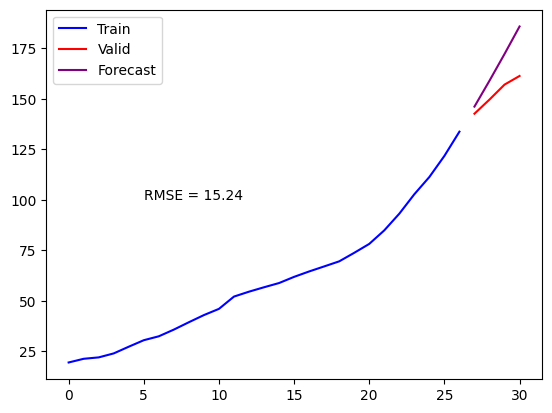

In [44]:
# plot the prediction for the test set 
plt.plot(y_train, label='Train', color='blue')
plt.plot(y_test, label='Valid', color='red')
plt.plot(forecast, label='Forecast', color='purple')
error = round(sqrt(mse(y_test, forecast)), 2)
plt.text(5, 100, "RMSE = " + str(error))
plt.legend(loc='best')
plt.show()

__SARIMA MILK__

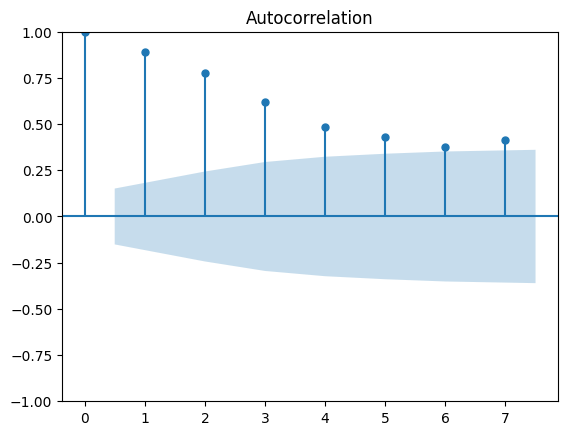

In [45]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')
plot_acf(df['Milk'], lags=7)
plt.show()


In [46]:
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]



In [47]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True,seasonal=True,m=12)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1000.136, Time=1.09 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1218.095, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1015.855, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1104.312, Time=0.22 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1349.320, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=998.169, Time=0.69 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1038.230, Time=0.21 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1000.125, Time=1.84 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1012.395, Time=0.61 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=3.04 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=996.457, Time=0.40 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1036.989, Time=0.11 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=998.423, Time=0.53 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=998.411, Time=1.19 sec
 ARIMA(1,0,2)(1,1,0)[12] int

In [48]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast, index=y_test.index, columns=['Prediction'])
forecast



,Prediction
156,838.789429
157,797.309920
158,902.001345
159,918.983705
160,982.162583
161,957.974300
162,916.613054
163,877.743347
164,828.806797
165,832.278879


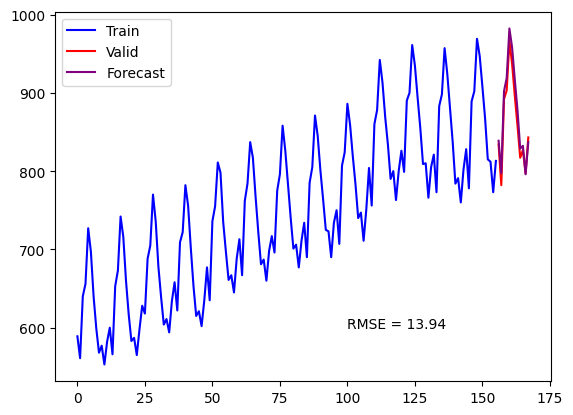

In [49]:
# plot the prediction for the test set 
plt.plot(y_train, label='Train', color='blue')
plt.plot(y_test, label='Valid', color='red')
plt.plot(forecast, label='Forecast', color='purple')
error = round(sqrt(mse(y_test, forecast)), 2)
plt.text(100, 600, "RMSE = " + str(error))
plt.legend(loc='best')
plt.show()

__SARIMA BUNDES BANK__

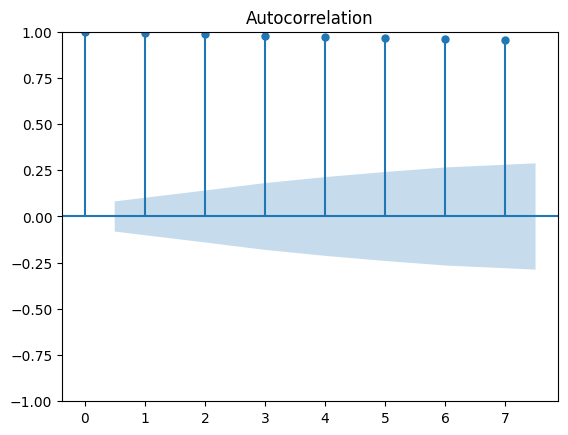

In [50]:
df = pd.read_csv('BUNDESBANK-BBK01_WT5511.csv')
plot_acf(df['Value'], lags=7)
plt.show()



In [51]:
y_train = df['Value'][:-6]
y_test = df['Value'][-6:]



In [52]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=12)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.08 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5685.919, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5682.975, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5682.375, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5685.643, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5680.751, Time=0.22 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=5682.347, Time=0.39 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=5683.125, Time=0.71 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5682.083, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=5681.760, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5681.456, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=5683.409, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=5680.967, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12] intercept
Total fit time: 4.659 seconds


In [53]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast, index=y_test.index, columns=['Prediction'])
forecast



,Prediction
571,1146.968799
572,1148.908900
573,1150.849001
574,1152.789101
575,1154.729202
576,1156.669302


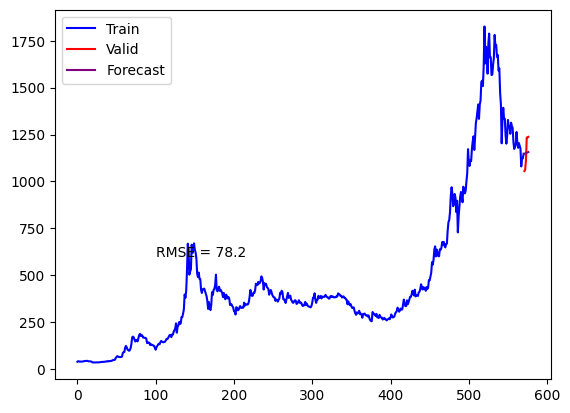

In [54]:
# plot the prediction for the test set 
plt.plot(y_train, label='Train', color='blue')
plt.plot(y_test, label='Valid', color='red')
plt.plot(forecast, label='Forecast', color='purple')
error = round(sqrt(mse(y_test, forecast)), 2)
plt.text(100, 600, "RMSE = " + str(error))
plt.legend(loc='best')
plt.show()